service rate = 6927.784615384616
[ 5456.98974359 10429.41538462 15218.27692308 18884.52820513]
[0.27350274 0.52271926 0.76273561 0.94648706]


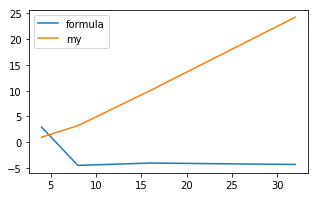

[ 5456.98974359 10429.41538462 15218.27692308 18884.52820513]
[0.78769622 1.50544741 2.1967018  2.72591157]


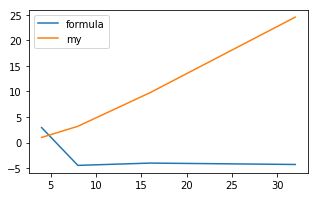

[ 5456.98974359 10429.41538462 15218.27692308 18884.52820513]
[0.78769622 1.50544741 2.1967018  2.72591157]


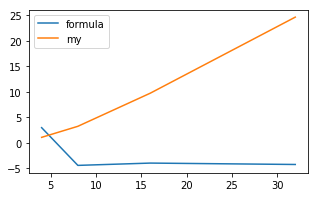

[ 5456.98974359 10429.41538462 15218.27692308 18884.52820513]
[0.78769622 1.50544741 2.1967018  2.72591157]


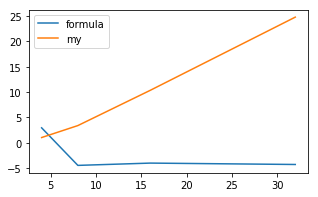

service rate = 19128.015384615388
[ 5456.98974359 10429.41538462 15218.27692308 18884.52820513]
[0.78769622 1.50544741 2.1967018  2.72591157]


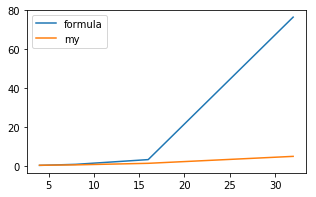

[ 5456.98974359 10429.41538462 15218.27692308 18884.52820513]
[0.28528782 0.54524294 0.79560146 0.98727065]


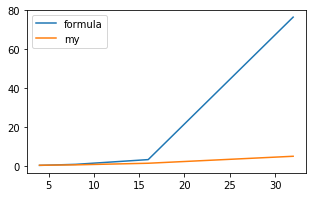

[ 5456.98974359 10429.41538462 15218.27692308 18884.52820513]
[0.28528782 0.54524294 0.79560146 0.98727065]


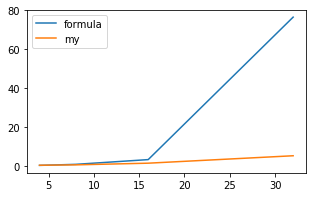

[ 5456.98974359 10429.41538462 15218.27692308 18884.52820513]
[0.28528782 0.54524294 0.79560146 0.98727065]


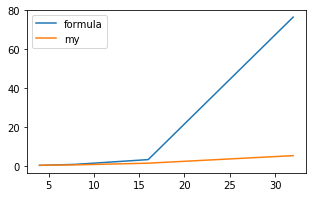

service rate = 19952.23076923077
[ 5456.98974359 10429.41538462 15218.27692308 18884.52820513]
[0.28528782 0.54524294 0.79560146 0.98727065]


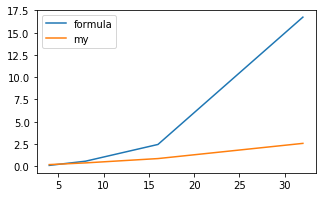

[ 5456.98974359 10429.41538462 15218.27692308 18884.52820513]
[0.27350274 0.52271926 0.76273561 0.94648706]


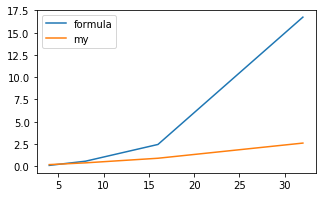

[ 5456.98974359 10429.41538462 15218.27692308 18884.52820513]
[0.27350274 0.52271926 0.76273561 0.94648706]


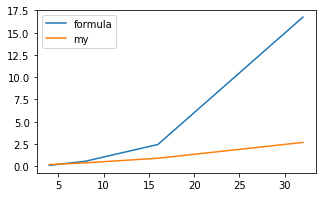

[ 5456.98974359 10429.41538462 15218.27692308 18884.52820513]
[0.27350274 0.52271926 0.76273561 0.94648706]


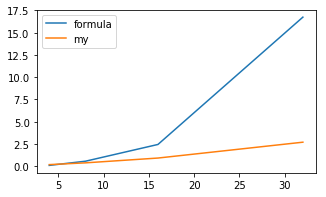

In [82]:
#M/M/1
import csv
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mean
import numpy as np

worker_threads = [8, 32, 64]
client_numbers = [4, 8, 16, 32]
value_sizes    = [64, 256, 512, 1024]
N = 4

# 0    1    2    3    4     5      6
# w    vl   cl   TR   TR1   TR2    TR3
fileTR = pd.read_csv("/home/anastasiia/asl-project-2019-ruzhanskaia/report_src/part" + str(N) + "_mid_TR_value_file.txt", header=None, delimiter=' ')
fileRT = pd.read_csv("/home/anastasiia/asl-project-2019-ruzhanskaia/report_src/part" + str(N) + "_mid_RT_value_file.txt", header=None, delimiter=' ')
fileQT = pd.read_csv("/home/anastasiia/asl-project-2019-ruzhanskaia/report_src/part" + str(N) + "_mid_QT_value_file.txt", header=None, delimiter=' ')
fileST = pd.read_csv("/home/anastasiia/asl-project-2019-ruzhanskaia/report_src/part" + str(N) + "_mid_ST_value_file.txt", header=None, delimiter=' ')
filePT = pd.read_csv("/home/anastasiia/asl-project-2019-ruzhanskaia/report_src/part" + str(N) + "_mid_PT_value_file.txt", header=None, delimiter=' ')
fileQS = pd.read_csv("/home/anastasiia/asl-project-2019-ruzhanskaia/report_src/part" + str(N) + "_mid_QS_value_file.txt", header=None, delimiter=' ')




service_rates = []
for w in worker_threads:
    subset = fileTR[(fileTR[0] == w)]
    result = subset[[4, 5, 6]].max(axis = 1)
    service_rates.append(float(result.max()))

# computer predictions for every formula
i = 0
#print((1 * 1000 / np.array(SR)) * np.array(worker_threads))
for w in worker_threads:
    SR = service_rates[i]
    print("service rate = " + str(SR))
    for value_size in value_sizes:
        TRs = np.array(fileTR[(fileTR[0] == w) & (fileTR[1] == value_size)][3])
        RTs = np.array(fileRT[(fileRT[0] == w) & (fileRT[1] == value_size)][3])
        QTs = np.array(fileQT[(fileQT[0] == w) & (fileQT[1] == value_size)][3])
        STs = np.array(fileST[(fileST[0] == w) & (fileST[1] == value_size)][3])
        PTs = np.array(filePT[(filePT[0] == w) & (filePT[1] == value_size)][3])
        QSs = np.array(fileQS[(fileQS[0] == w) & (fileQS[1] == value_size)][3])
        SR_should_be = 1000 / STs
        
        print(TR)
        print(po)
        # book formulas
        # utilization
        po = TR / SR
        # mean number of jobs in the system
        JS = po / (1 - po)
        # mean number of jobs in queue
        JQ = po * po / (1 - po)
        # mean response time 
        RT = (1000 / SR) / (1 - po)
        # mean waiting time
        WT = (1000 * po / SR) / (1 - po)
        
        
        plt.figure(figsize=(5, 3))
        plt.plot(client_numbers, JQ, label = "formula")
        plt.plot(client_numbers, QTs, label = "my")
        plt.legend(loc="upper left")
        plt.show()
    i += 1
        
            

In [78]:
#M/M/m
import csv
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mean
import numpy as np
import math

worker_threads = [8, 32, 64]
client_numbers = [4, 8, 16, 32]
value_sizes    = [64, 256, 512, 1024]
N = 4

# 0    1    2    3    4     5      6
# w    vl   cl   TR   TR1   TR2    TR3
fileWTR = pd.read_csv("/home/anastasiia/asl-project-2019-ruzhanskaia/report_src/part" + str(N) + "_mid_WTR_value_file.txt", header=None, delimiter=' ')
fileTR = pd.read_csv("/home/anastasiia/asl-project-2019-ruzhanskaia/report_src/part" + str(N) + "_mid_TR_value_file.txt", header=None, delimiter=' ')
fileRT = pd.read_csv("/home/anastasiia/asl-project-2019-ruzhanskaia/report_src/part" + str(N) + "_mid_RT_value_file.txt", header=None, delimiter=' ')
fileQT = pd.read_csv("/home/anastasiia/asl-project-2019-ruzhanskaia/report_src/part" + str(N) + "_mid_QT_value_file.txt", header=None, delimiter=' ')
fileST = pd.read_csv("/home/anastasiia/asl-project-2019-ruzhanskaia/report_src/part" + str(N) + "_mid_ST_value_file.txt", header=None, delimiter=' ')
filePT = pd.read_csv("/home/anastasiia/asl-project-2019-ruzhanskaia/report_src/part" + str(N) + "_mid_PT_value_file.txt", header=None, delimiter=' ')
fileQS = pd.read_csv("/home/anastasiia/asl-project-2019-ruzhanskaia/report_src/part" + str(N) + "_mid_QS_value_file.txt", header=None, delimiter=' ')

service_rates = []
for w in worker_threads:
    subset = fileWTR[(fileWTR[0] == w)]
    result = subset[[4, 5, 6]].max(axis = 1)
    service_rates.append(float(result.max()))
    

# computer predictions for every formula
i = 0
for w in worker_threads:
    SR = service_rates[i]
    for value_size in value_sizes:
        TRs = np.array(fileTR[(fileTR[0] == w) & (fileTR[1] == value_size)][3])
        RTs = np.array(fileRT[(fileRT[0] == w) & (fileRT[1] == value_size)][3])
        QTs = np.array(fileQT[(fileQT[0] == w) & (fileQT[1] == value_size)][3])
        STs = np.array(fileST[(fileST[0] == w) & (fileST[1] == value_size)][3])
        PTs = np.array(filePT[(filePT[0] == w) & (filePT[1] == value_size)][3])
        QSs = np.array(fileQS[(fileQS[0] == w) & (fileQS[1] == value_size)][3])
        SR_should_be = 1000 / STs
        
        # book formulas
        # utilization
        po = TR / (w * SR)
        #probablty of zero jobs in system
        p0 = (1 + ((w * po)** w) / (math.factorial(w) * (1 - po)))
        p0 += sum([ ((w * po) ** i) / math.factorial(i) for i in range (1, w)])
        p0 = 1.0 / p0
        # probability of queueing
        p = ((w * po) ** w * p0) / (math.factorial(w) * (1 - po))
        # mean number of jobs in the system
        #JS = po / (1 - po)
        # mean number of jobs in queue
        JQ = po * p / (1 - po)
        # mean response time 
        #RT = (1000 / SR) / (1 - po)
        # mean waiting time
        WT = (1000 * p) / (w * SR * (1 - po))
        
        
        #plt.figure(figsize=(5, 3))
        #plt.plot(client_numbers, JQ, label = "formula")
        
        subset = fileQT[(fileQT[0] == w) & (fileQT[1] == value_size)]
        myQT = np.array(subset[3])
        '''print(po)
        print(WT)
        print(myQT)
        plt.plot(client_numbers, myQT, label = "my")
        plt.legend(loc="upper left")
        plt.show()'''
        
        # formulas from the slide
        # set up service time
        Es = 1000 / SR
        print("Es = " + str(Es))
        # set up number of elements in queue
        Enq = np.array(fileQS[(fileQS[0] == w) & (fileQS[1] == value_size)][3])
        # waiting time in queue 
        Ewq = Enq * 1000/ TR
        print("Enq = " + str(Enq))
        print("TR = " + str(TR))
        print("Ewq = " + str(Ewq))
        
        # average response time
        Ew = Ewq + Es
        
        print("Computed response time = " + str(Ew))
        print("Measured response time = " + str(np.array(fileRT[(fileRT[0] == w) & (fileRT[1] == value_size)][3])))
        
    i += 1
        
            

Es = 1.15477031174357
Enq = [  7.32255473  21.3060165   66.19123717 161.22558917]
TR = [3977.01538462 6255.87179487 6668.96410256 6679.14871795]
Ewq = [ 1.84121861  3.40576297  9.92526518 24.13864341]
Computed response time = [ 2.99598892  4.56053328 11.08003549 25.29341372]
Measured response time = [ 2.25299477  4.42101246 11.21276745 25.43384156]
Es = 1.15477031174357
Enq = [  7.40277381  21.20060823  65.96824009 161.68435181]
TR = [4018.91282051 6310.04102564 6817.82051282 6612.05128205]
Ewq = [ 1.84198417  3.35982098  9.67585462 24.4529791 ]
Computed response time = [ 2.99675448  4.51459129 10.83062493 25.60774941]
Measured response time = [ 2.21596605  4.36931858 10.96430621 25.77030519]
Es = 1.15477031174357
Enq = [  7.71847551  21.55059063  65.57496525 161.51012455]
TR = [3991.03589744 6311.85128205 6876.75897436 6602.12820513]
Ewq = [ 1.93395291  3.41430583  9.53573704 24.46334266]
Computed response time = [ 3.08872323  4.56907614 10.69050735 25.61811297]
Measured response time